In [12]:
import re
from pandas import read_csv
import seaborn as sn
from IPython import display as ICD


In [13]:
# Coleta e Tratamento dos Dados

dados = read_csv('./dados.csv')

columns = list(dados.columns)[2:]

dados = dados[dados['Região'] != 'Grande Vitória (ES)']

dados['Ano'] =  dados['Mês'].apply(lambda mes: re.findall('\d{4}',mes) [0])

dados['Mês'] = dados['Mês'].apply(lambda mes: re.findall('\w+', mes)[0])

for column in columns:
    dados[column] = dados[column].apply(lambda value: value.replace(',', '.')).astype(float)
    

def categorizar_cidade(city): return 'Nordeste' if city in ['Fortaleza (CE)', 'Recife (PE)', 'Salvador (BA)'] else \
    'Sudeste' if city in ['Belo Horizonte (MG)', 'Rio de Janeiro (RJ)', 'São Paulo (SP)'] else \
    'Sul' if city in ['Curitiba (PR)', 'Porto Alegre (RS)'] else \
    'Norte' if city == 'Belém (PA)' else 'Outra região'
    
dados['Zona'] = dados['Região'].apply(categorizar_cidade)
    

In [14]:
# Calculo do IPCA Mensal

IPCA = dados['Alimentação'] * (dados['Alimentação (Peso)']/ 100)

for index in range(1,9):
    IPCA = IPCA + (dados[columns[index]] * (dados[columns[index + 9]] / 100))

dados['IPCA'] = IPCA / 9

In [15]:
# Agrupando os Dados

agrupado_regiao = dados.groupby('Região')
agrupado_zona = dados.groupby('Zona')
agrupado_ano = dados.groupby('Ano')
agrupado_mes = dados.groupby('Mês')
agrupado_ano_mes = dados.groupby(['Mês', 'Ano'])


/tmp/ipykernel_148728/2440137992.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  correlacao = agrupado_ano_mes.sum()[['IPCA', *columns[:9]]].corr('pearson')


<Axes: >

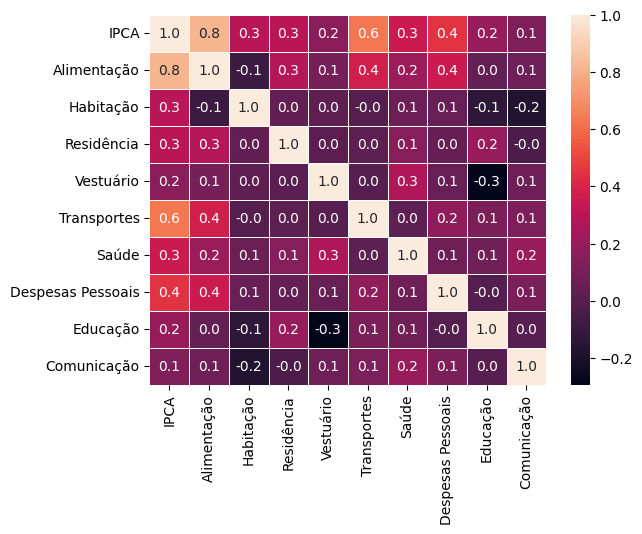

In [26]:
# Gráfico de Mapa de Calor considerando os Meses dos Anos

correlacao = agrupado_ano_mes.sum()[['IPCA', *columns[:9]]].corr('pearson')

plot = sn.heatmap(correlacao, annot=True, fmt=".1f", linewidths=.6)

plot


<Axes: >

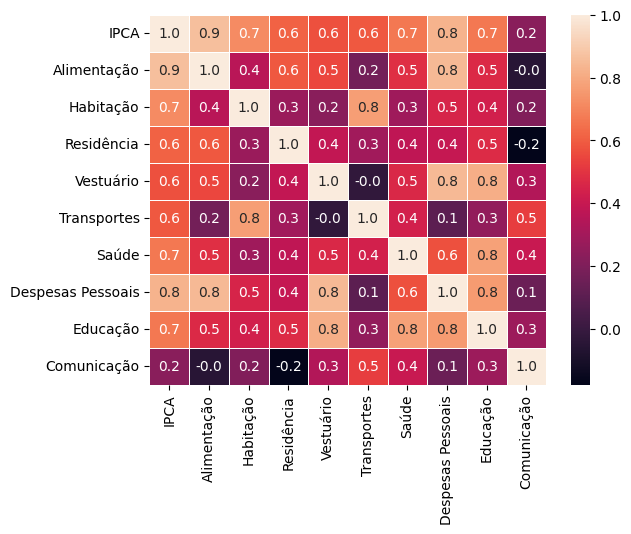

In [17]:
# Gráfico de Mapa de Calor considerando o Total dos Anos

correlacao = agrupado_ano[['IPCA', *columns[:9]]].sum().corr('pearson')

plot = sn.heatmap(correlacao, annot=True, fmt=".1f", linewidths=.6)

plot


/tmp/ipykernel_148728/2808934517.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agrupado_ano_mes.sum()[['IPCA',*columns[:9]]].boxplot(return_type='axes', figsize=(16,9))


<Axes: >

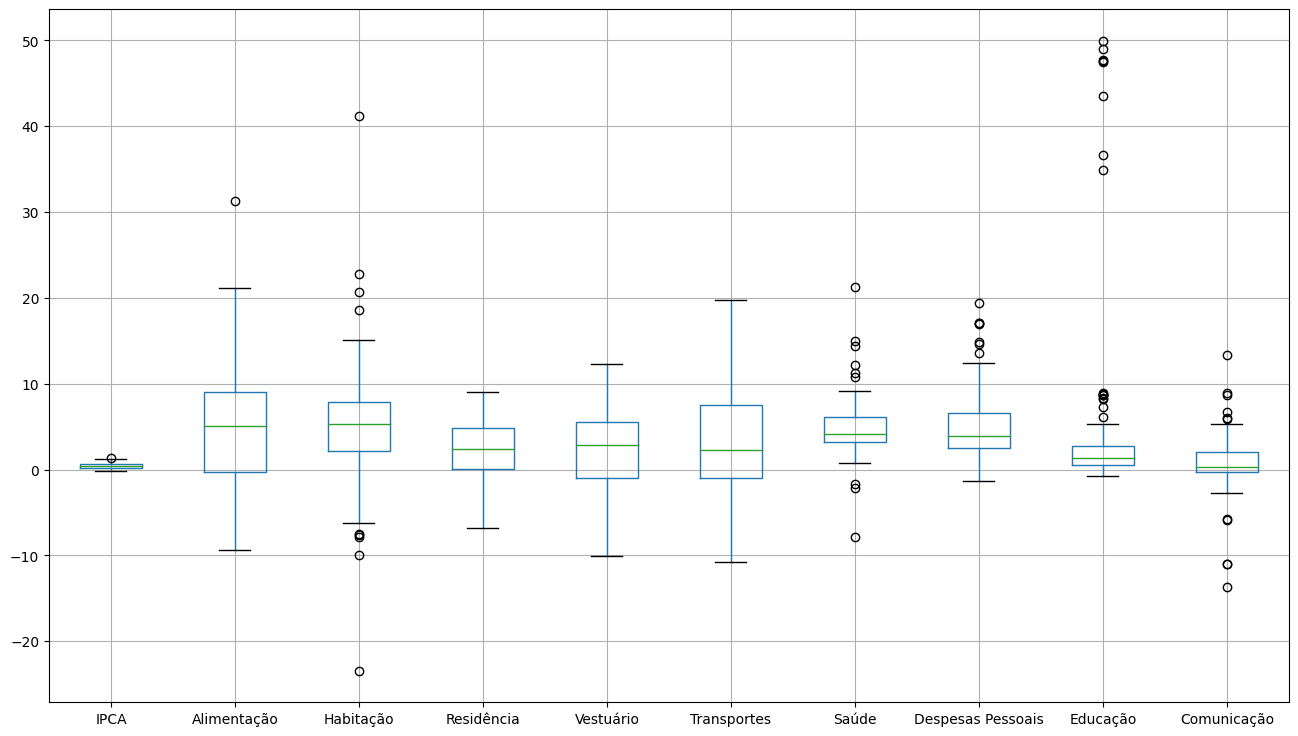

In [25]:
# Box Plot Mensal

agrupado_ano_mes.sum()[['IPCA',*columns[:9]]].boxplot(return_type='axes', figsize=(16,9))

/tmp/ipykernel_148728/2985076162.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agrupado_ano.sum()[['IPCA',*columns[:9]]].boxplot(return_type='axes', figsize=(16,9))


<Axes: >

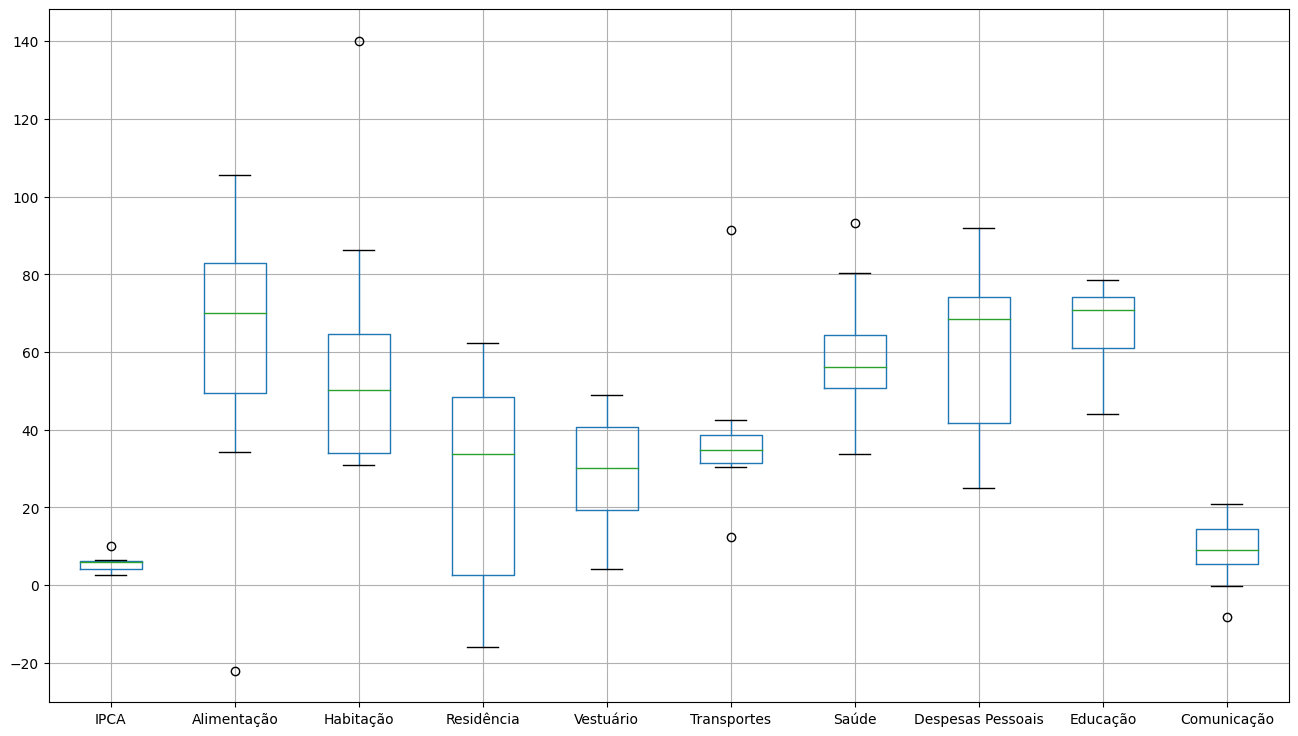

In [19]:
# Box Plot Anual

agrupado_ano.sum()[['IPCA',*columns[:9]]].boxplot(return_type='axes', figsize=(16,9))

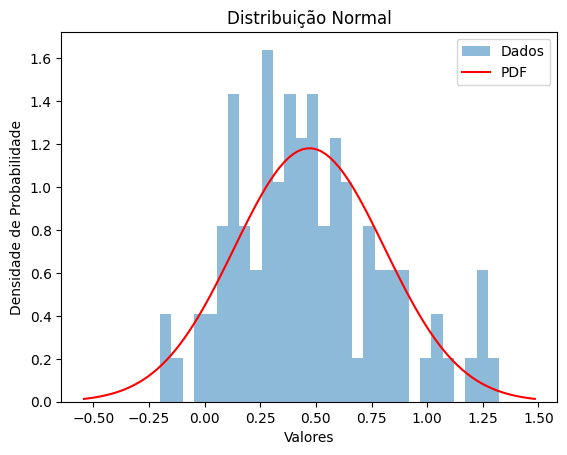

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Gerar uma amostra de dados seguindo uma distribuição normal
data = agrupado_ano_mes['IPCA'].sum()
mu = data.mean()  # Média
sigma = data.std()  # Desvio padrão

# Calcular estatísticas básicas
mean = np.mean(data)
std = np.std(data)
variance = np.var(data)

# Plotar o histograma dos dados
plt.hist(data, bins=30, density=True, alpha=0.5, label='Dados')

# Plotar a função de densidade de probabilidade (PDF)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

pdf = norm.pdf(x, mu, sigma)

plt.plot(x, pdf, 'r', label='PDF')

plt.title('Distribuição Normal')
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

In [28]:
agrupado_ano_mes.sum()[['IPCA', 'Alimentação', 'Transportes', 'Habitação']].describe()

/tmp/ipykernel_148728/1230176565.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agrupado_ano_mes.sum()[['IPCA', 'Alimentação', 'Transportes', 'Habitação']].describe()


,IPCA,Alimentação,Transportes,Habitação
count,96.000000,96.000000,96.000000,96.000000
mean,0.470838,5.049688,3.288021,5.020938
std,0.337646,6.852280,5.877816,7.490224
min,-0.200389,-9.400000,-10.770000,-23.440000
25%,0.239965,-0.272500,-1.035000,2.220000
50%,0.429143,5.030000,2.335000,5.295000
75%,0.651092,9.025000,7.497500,7.840000
max,1.323301,31.290000,19.810000,41.160000
